In [1]:
# Part 3 of presentation for Kariera IT conference in Wrocław, Poland (06-10-2018).
# Copyright: Szymon Moliński, Data Lions
# More about pyinterpolate here: https://github.com/szymon-datalions/pyinterpolate

In [1]:
%matplotlib inline

from pyinterpolate.kriging.helper_functions.read_data import read_data
from pyinterpolate.kriging.semivariance import calculate_semivariance
from pyinterpolate.kriging.fit_semivariance import TheoreticalSemivariogram
from pyinterpolate.kriging.kriging import Krige
from pyinterpolate.kriging.helper_functions import raster_preparation
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dem_points = read_data('../data/gorzow_dem_01p.dat', sep=',')

In [3]:
dem_points.shape

(6895, 3)

In [4]:
hh = 0.025
lags = np.arange(0, 0.5, hh)
gamma = calculate_semivariance(dem_points, lags, hh)

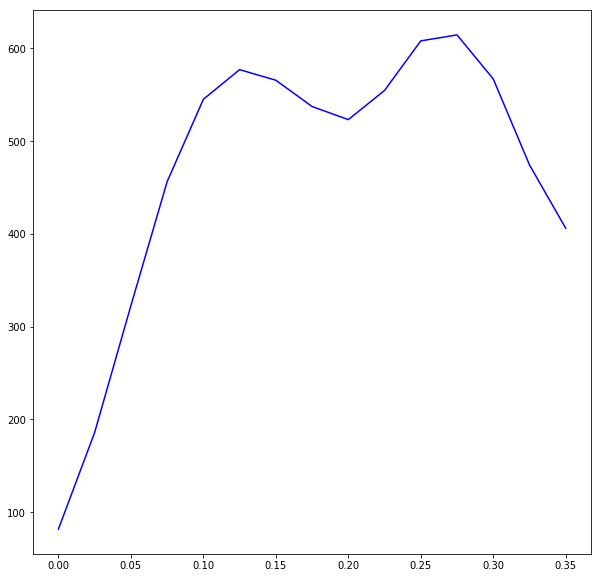

In [5]:
plt.figure(figsize=(10, 10))
plt.plot(gamma[0], gamma[1], color='blue')
plt.show()

In [6]:
semivariogram = TheoreticalSemivariogram(dem_points, gamma)
semivariogram.fit_semivariance('linear')
x = semivariogram.calculate_values()

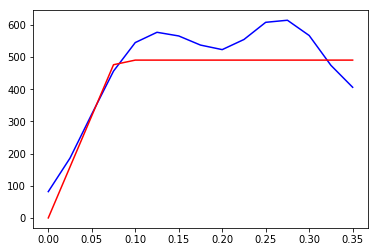

In [7]:
plt.figure()
plt.plot(gamma[0], gamma[1], color = 'blue')
plt.plot(gamma[0], x, color = 'red')
plt.show()

In [8]:
model = Krige(dem_points, semivariogram)

In [9]:
raster, error_matrix = model.interpolate_raster(scale_factor=0.005, number_of_neighbours=6, kriging_type='simple')

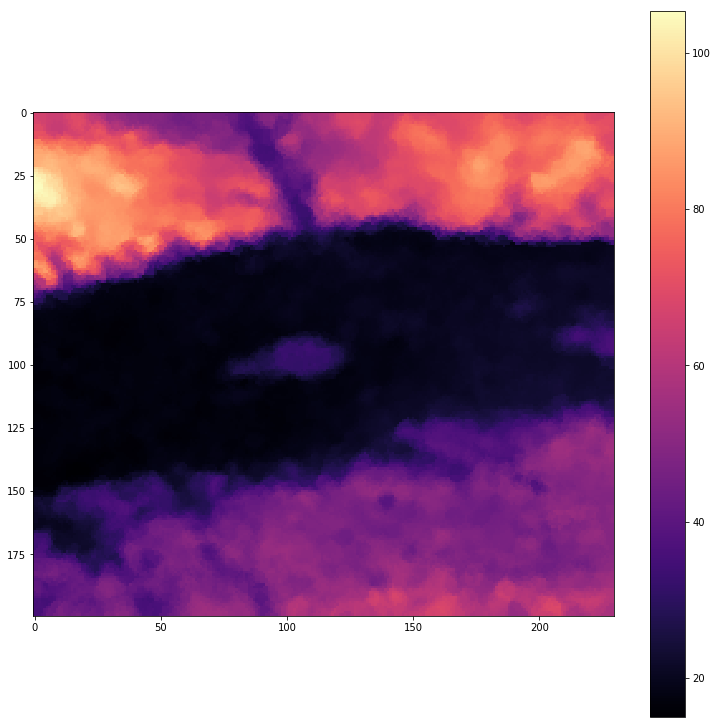

In [10]:
plt.figure(figsize=(13,13))
plt.imshow(raster, cmap="magma")
plt.colorbar()
plt.show()

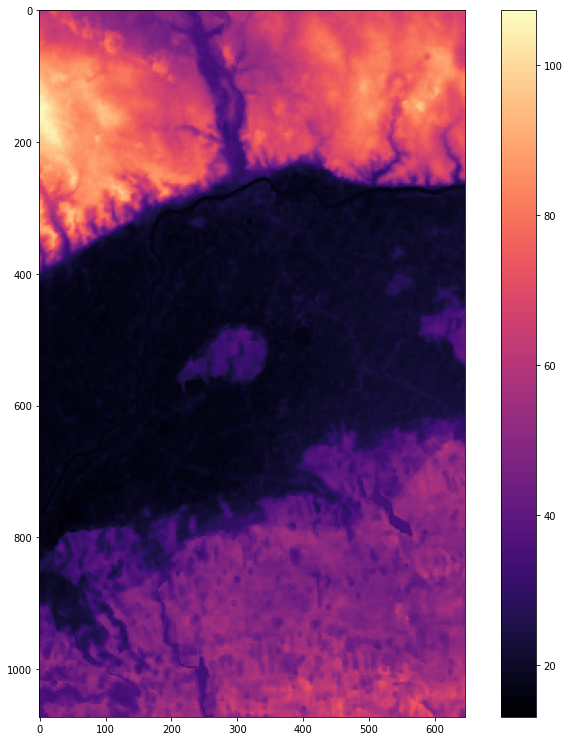

In [11]:
# Comparison to the base image

import rasterio as rio

with rio.open('../data/gorzow_wielkopolski_dem.tif', 'r') as base:
    base_dem = base.read(1)
    
plt.figure(figsize=(13, 13))
plt.imshow(base_dem, cmap='magma')
plt.colorbar()
plt.show()

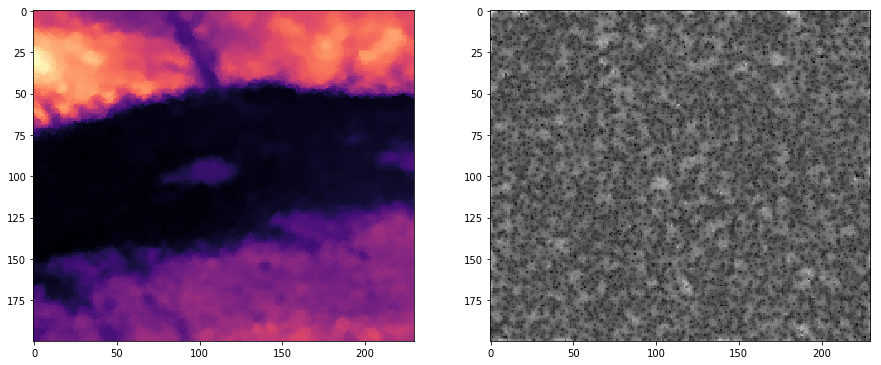

In [12]:
# Comparison to the error matrix

plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(raster, cmap='magma')
plt.subplot(122)
plt.imshow(error_matrix, cmap='gray')
plt.savefig('simplekriging.png', dpi=600)
plt.show()

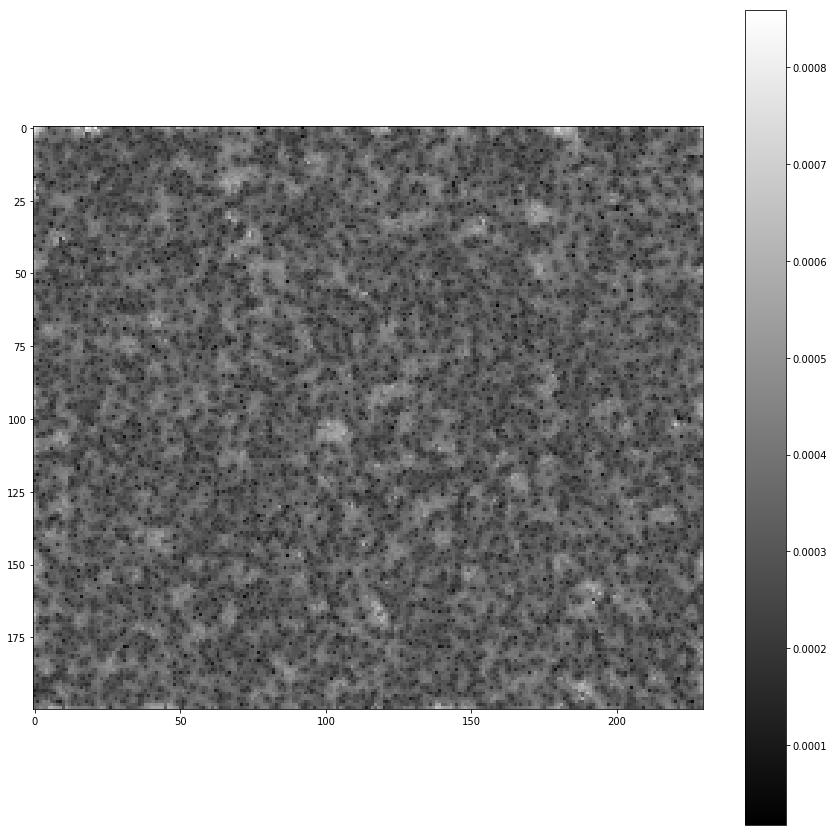

In [13]:
plt.figure(figsize=(15, 15))
plt.imshow(error_matrix, cmap='gray')
plt.colorbar()
plt.savefig('error.png', dpi=600)
plt.show()